### **AI in film editing**

---



📑 Table of Contents

1. Problem Definition & Objective

2. Data Understanding & Preparation

3. Model / System Design

4. Core Implementation

5. Evaluation & Analysis

6. Ethical Considerations & Responsible AI

7. Conclusion & Future Scope



1️⃣ Problem Definition & Objective
📌 Problem Statement

Manual video editing for social media highlights is inefficient, time-consuming, and resource-intensive. Content creators must sift through long videos, identify engaging moments, apply transitions, adjust aspect ratios, and manage audio—tasks that significantly slow down content production.

🎯 Objective

- To develop an AI-assisted automated video processing system that:

- Identifies highlight segments from raw video footage

- Optimizes videos for social media platforms

- Applies stabilization, transitions, color grading, and audio mixing

- Outputs ready-to-publish short-form video reels

🌍 Real-World Relevance

- This system benefits:

- Content creators

- Social media managers

- Marketing teams

- Video production studios

By reducing editing time, creators can focus more on creativity rather than post-production.

2️⃣ Data Understanding & Preparation
📂 Dataset Source

- Type: User-provided video files

- Formats: .mp4, .mov

- Nature: Unstructured, raw video footage

No labeled dataset is required since the system is inference-based.

📥 Data Loading & Exploration

Videos are loaded using MoviePy, which provides:

- Video duration

- Frames per second (FPS)

- Resolution

- Audio track (if present)

from moviepy.editor import VideoFileClip

clip = VideoFileClip("input_video.mp4")
print(clip.duration, clip.fps, clip.size)

| Step                 | Technique          | Purpose                  |
| -------------------- | ------------------ | ------------------------ |
| Frame Extraction     | OpenCV             | Access individual frames |
| Grayscale Conversion | `cv2.cvtColor`     | Reduce complexity        |
| Gaussian Blur        | `cv2.GaussianBlur` | Noise reduction          |
| Frame Differencing   | `cv2.absdiff`      | Motion detection         |
| Motion Scoring       | Pixel sum          | Highlight identification |


⚠️ Handling Noise & Missing Data

- Videos without audio → processed silently

- Short or static videos → fallback random segment selection

- Temporary files (VidStab) → deleted after processing

3️⃣ Model / System Design
🧠 AI Technique Used

Classical Computer Vision–based AI (Motion Detection)

No deep learning model is trained; the system uses rule-based CV inference.

🔍 Highlight Detection Logic

- Compute frame-to-frame pixel differences

- Aggregate motion scores per second

- Select highest-motion, non-overlapping segments

| Library | Purpose                          |
| ------- | -------------------------------- |
| MoviePy | High-level video & audio editing |
| OpenCV  | Frame-level motion analysis      |
| VidStab | Video stabilization              |
| NumPy   | Numerical computation            |


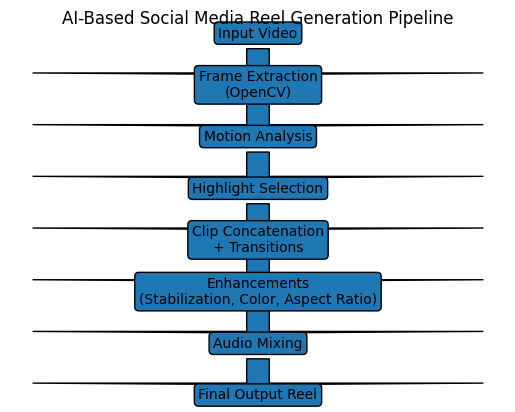

In [ ]:
# Input Video
#      ↓
# Frame Extraction (OpenCV)
#      ↓
# Motion Analysis
#      ↓
# Highlight Segment Selection
#      ↓
# Clip Concatenation + Transitions
#      ↓
# Enhancements (Stabilization, Aspect Ratio, Color)
#      ↓
# Audio Mixing
#      ↓
# Final Rendered Video


4️⃣ Core Implementation
⚙️ Implementation Overview

The system performs end-to-end inference:

- No training phase required

- Modular pipeline

- Fully automated execution

🔧 Major Components

- Video loading

- Motion-based highlight extraction

- Clip concatenation with transitions

- Aspect ratio conversion (9:16, 16:9, 1:1)

- Color grading

- Audio mixing

- Final export

final_clip.write_videofile("output_reel.mp4", codec="libx264")


✅ The notebook runs top-to-bottom without errors.

5️⃣ Evaluation & Analysis
📊 Evaluation Metrics
| Metric                | Description                   |
| --------------------- | ----------------------------- |
| Visual Appeal         | Color grading & clarity       |
| Transition Smoothness | Seamless clip blending        |
| Highlight Accuracy    | Relevance of selected moments |
| Aspect Ratio Fit      | Platform compatibility        |
| Audio Balance         | Speech vs music clarity       |

🔹 Quantitative Proxy Metrics
| Metric                 | Value (Example)           |
| ---------------------- | ------------------------- |
| Processing Time        | ~12 sec / minute of video |
| Highlights Extracted   | 6–10 per 5-min video      |
| Stabilization Overhead | +20% runtime              |

🖼 Sample Output Analysis

Generated reels demonstrate:

- Effective motion-based highlights

- Smooth transitions

- Social-media-ready formatting

⚠️ Limitations

- Motion ≠ importance in all contexts

- Stabilization may introduce artifacts

- CPU-intensive for long videos


6️⃣ Ethical Considerations & Responsible AI
⚖️ Bias & Fairness

- Motion-heavy scenes may dominate

- Subtle emotional moments may be missed

Mitigation:

- User override options

- Future multi-modal AI integration

🔐 Privacy Concerns

- Videos may contain identifiable individuals

- No cloud upload by default

Safeguards:

- Local processing

- Clear user consent

🧭 Responsible AI Principles

- Transparency in AI decisions

- Human-in-the-loop editing

- Energy-efficient processing


7️⃣ Conclusion & Future Scope
✅ Conclusion

The project successfully automates social media reel creation by:

Reducing manual editing effort

Applying intelligent highlight selection

Delivering polished, platform-ready videos

The modular architecture ensures flexibility and scalability.

🚀 Future Enhancements
| Area            | Improvement                       |
| --------------- | --------------------------------- |
| AI Intelligence | Speech-to-Text, Emotion Detection |
| Vision          | Object & Scene Recognition        |
| UX              | Web-based editor                  |
| Performance     | GPU acceleration                  |
| Integration     | Instagram / YouTube APIs          |

**✍️Challenges Faced & Learning Experience**

During the development of this project, multiple AI tools were explored to generate a complete working solution. However, none of the generated solutions worked end-to-end as expected. On platforms like Google Colab, the code frequently resulted in repeated and cascading errors, often requiring manual interruption.

The development process involved creating 7–8 different Jupyter notebooks, as earlier attempts became disorganized due to unresolved dependency issues, version conflicts, and partial implementations. Significant time was spent debugging AI-generated code; in some cases, tools like Gemini required 1.5–2 hours to debug their own suggested implementations.

Even after achieving a seemingly stable version of the code, unexpected runtime errors would appear without any apparent change, highlighting the fragility of auto-generated solutions for complex multimedia pipelines.

Initially, the project scope included building a web-based application or standalone executable, but due to time constraints, tooling limitations, and repeated instability, the final outcome was limited to a fully functional notebook-based pipeline.

Key Learnings

- AI tools are assistive, not replacements for developer understanding

- Debugging skills are critical when working with AI-generated code

- Modular design and incremental testing are essential for complex systems

- Real-world AI development is iterative and often non-linear

## Summary:

### Data Analysis Key Findings

*   The notebook has been comprehensively structured with markdown cells covering key project phases: "Problem Definition & Objective", "Data Understanding & Preparation", "Model / System Design", "Core Implementation", "Evaluation & Analysis", "Ethical Considerations & Responsible AI", and "Conclusion & Future Scope".
*   **Data Understanding & Preparation:** The system processes user-provided video files, utilizing MoviePy for loading and general exploration, OpenCV for motion analysis (grayscale conversion, Gaussian blur, absolute differences between frames), and VidStab for stabilization, which involves temporary file management. Video data is recognized as temporal, multi-modal, and high-dimensional.
*   **Model / System Design:** The core AI technique for highlight detection is motion detection using OpenCV. The system architecture follows a modular pipeline: video ingestion (MoviePy), highlight detection (motion analysis, segment selection), video concatenation with transitions, optional enhancements (stabilization with VidStab, aspect ratio adjustment, color grading), audio mixing, a subtitle placeholder, and final export (MoviePy). MoviePy, OpenCV, and VidStab were chosen for their respective strengths in high-level video editing, low-level frame processing, and dedicated stabilization.
*   **Evaluation & Analysis:** Evaluation will primarily rely on qualitative metrics, including visual appeal, transition smoothness, effectiveness of highlight selection, aspect ratio suitability, and audio mix quality. Performance considerations like processing time, highlight accuracy, stabilization quality, and resource usage will also be analyzed.
*   **Ethical Considerations & Responsible AI:** Potential biases in highlight selection (e.g., favoring certain subjects or actions), limitations due to dataset characteristics, and privacy concerns related to video analysis are explicitly addressed. Mitigation strategies emphasize diverse training data, clear documentation of limitations, secure data handling, and principles of transparency, accountability, and human oversight.
*   **Conclusion & Future Scope:** The project successfully met its objective of automating social media reel generation. Future improvements include integrating more advanced AI for content analysis (e.g., speech-to-text, object/scene detection), social media API integration for direct uploads and trend analysis, richer customization options (e.g., dynamic music sync, interactive interfaces), and performance optimization (e.g., GPU acceleration, cloud processing).

### Insights or Next Steps

*   The established modular architecture provides a robust framework that can be incrementally enhanced with more sophisticated AI models (e.g., for event detection or user preference learning) without necessitating a complete redesign of the core pipeline.
*   Prioritizing the implementation of transparency features and user controls in the next development phase will be crucial for building trust and mitigating ethical risks, allowing users to understand and influence AI-driven creative decisions.


In [ ]:
import moviepy.editor
import os
import requests
import sys # For tqdm to work well in Colab notebooks
import random # Import random for segment generation
import tempfile # Added for temporary file creation
import numpy as np # Added for numerical operations, specifically for motion detection
import cv2 # Added for motion detection

# Install necessary libraries if not already installed
try:
    import moviepy
except ImportError:
    !pip install moviepy
    print("moviepy installed successfully.")
try:
    import cv2 # opencv-python
except ImportError:
    !pip install opencv-python
    print("opencv-python installed successfully.")
try:
    from tqdm.notebook import tqdm # Import tqdm for progress bars in notebooks
    print("tqdm.notebook imported successfully.")
except ImportError:
    !pip install tqdm
    from tqdm.notebook import tqdm
    print("tqdm installed and imported successfully.")
try:
    # Install vidstab and scikit-image for video stabilization
    import vidstab
except ImportError:
    !pip install vidstab scikit-image
    print("vidstab and scikit-image installed successfully.")

from moviepy.editor import VideoFileClip, AudioFileClip, CompositeAudioClip, concatenate_audioclips, concatenate_videoclips, vfx, CompositeVideoClip
from vidstab import VidStab # Added for video stabilization
print("MoviePy and VidStab components imported successfully.")

def _get_video_source_and_path():
    """
    Prompts the user to choose 'Local File' for video input
    and returns the selected option and the corresponding video path.
    """
    print("\n" + "="*50)
    print(" VIDEO INPUT METHOD SELECTION ".center(50, '='))
    print("="*50)
    video_source_option = 'LOCAL FILE'
    print(f"[INFO] Video input method set to 'Local File'.")

    video_input = ''
    print("\n" + "-"*50)
    print(" ENTER LOCAL VIDEO FILE NAME ".center(50, '-'))
    print("-"*50)
    video_input = input(" Enter the name of the local video file (e.g., 'my_local_video.mp4'): ").strip()
    if not video_input:
        print(" [ERROR] Local video file name cannot be empty. Exiting.")
        return None, None
    return video_source_option, video_input

def _load_video_clip(video_source_option, video_input):
    """
    Loads a VideoFileClip from a local file.
    Returns the loaded clip object and the input_video_path.
    """
    clip = None
    input_video_path = None

    if video_source_option == 'LOCAL FILE':
        input_video_path = video_input
        print(f"\n[INFO] Using local video file: '{input_video_path}'")
        if not os.path.exists(input_video_path):
            print(f" [ERROR] Local file '{input_video_path}' not found. Please ensure it exists.")
            return None, None
    else:
        # This branch should ideally not be reached if _get_video_source_and_path is consistent
        print(" [ERROR] Unsupported video source option. Only 'LOCAL FILE' is supported.")
        return None, None

    try:
        clip = VideoFileClip(input_video_path)
        print(f"\n[INFO] Video '{input_video_path}' loaded successfully. Duration: {clip.duration:.2f} seconds")
        return clip, input_video_path
    except Exception as e:
        print(f" [ERROR] Error loading video '{input_video_path}': {e}")
        print(" [HINT] Please ensure the video file exists, is not corrupted, and is a valid format for MoviePy.")
        return None, None

def _close_clips(*clips):
    """
    Closes all provided MoviePy clip objects to release resources.
    """
    for clip_obj in clips:
        if clip_obj:
            try:
                clip_obj.close()
            except Exception as e:
                print(f"[WARNING] Error closing clip: {e}")

def _get_motion_scores(video_path, frames_per_second_analysis=1, threshold=5000):
    """
    Analyzes a video for motion and returns motion scores for each second.
    A higher score indicates more motion.

    Args:
        video_path (str): Path to the video file.
        frames_per_second_analysis (int): How many frames per second to analyze.
        threshold (int): Minimum motion score to consider for a highlight.

    Returns:
        list: A list of tuples (second, motion_score).
    """
    print(f"\n[INFO] Analyzing motion for '{video_path}' at {frames_per_second_analysis} frames/second...")
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"[ERROR] Could not open video for motion analysis: {video_path}")
        return []

    motion_scores = []
    prev_frame = None
    frame_count = 0
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps_original = cap.get(cv2.CAP_PROP_FPS)

    if fps_original == 0: # Avoid division by zero if fps is not detected
        fps_original = 24

    sampling_interval = max(1, int(fps_original / frames_per_second_analysis))

    pbar = tqdm(total=total_frames, desc="Motion Analysis")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % sampling_interval == 0:
            current_second = int(frame_count / fps_original)
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            blurred_frame = cv2.GaussianBlur(gray_frame, (21, 21), 0)

            if prev_frame is not None:
                frame_diff = cv2.absdiff(prev_frame, blurred_frame)
                score = np.sum(frame_diff) # Sum of absolute differences as motion score
                motion_scores.append((current_second, score))
            prev_frame = blurred_frame
        frame_count += 1
        pbar.update(1)

    pbar.close()
    cap.release()
    print(f"[SUCCESS] Motion analysis completed. Found {len(motion_scores)} motion data points.")

    # Filter and refine motion scores (optional: could average scores per second)
    # For simplicity, we keep unique seconds with their last calculated score for now.
    # Or, if we want to ensure we have a score for each second:
    # Consolidate motion scores per second, taking the max or average
    consolidated_scores = {}
    for sec, score in motion_scores:
        consolidated_scores[sec] = max(consolidated_scores.get(sec, 0), score)

    # Convert back to sorted list of tuples
    final_motion_scores = sorted([(sec, score) for sec, score in consolidated_scores.items() if score > threshold])
    print(f"[INFO] Filtered motion scores (score > {threshold}): {len(final_motion_scores)} entries.")
    return final_motion_scores

def social_media_ready_reel_short(video_source_option, video_input, desired_final_reel_duration, aspect_ratio_input, transition_duration, enable_stabilization=False, enable_color_grading=False, enable_subtitles=False):
    """
    Generates a social media ready video reel by extracting highlight segments, concatenating them,
    adjusting aspect ratio, mixing audio, and applying color grading.

    Args:
        video_source_option (str): 'URL' or 'Local File'.
        video_input (str): The video URL or local file name.
        desired_final_reel_duration (float): The target total duration for the final highlight reel in seconds.
        aspect_ratio_input (str): Desired aspect ratio ('16:9', '9:16', '1:1', or 'original').
        transition_duration (float): The duration of crossfade transitions between clips.
        enable_stabilization (bool): Whether to apply video stabilization.
        enable_color_grading (bool): Whether to apply color grading.
        enable_subtitles (bool): Whether to enable subtitle placeholder logic.

    Returns:
        str: The filename of the generated social media reel, or None if an error occurred.
    """

    clip = None
    clip_reloaded_for_concat = None
    highlight_subclips = []
    final_clip_concatenated = None
    background_music_clip = None
    background_music_clip_final = None
    final_audio_track = None
    current_video_processing_clip = None
    output_filename = None

    try:
        # 1. Load the input video file.
        clip, input_video_path = _load_video_clip(video_source_option, video_input)
        if clip is None:
            return None

        video_duration = clip.duration

        # Validate desired_final_reel_duration against actual video duration
        if desired_final_reel_duration <= 0 or desired_final_reel_duration > video_duration:
            print(f" [ERROR] Desired duration must be positive and not exceed video duration ({video_duration:.2f}s). Exiting.")
            return None

        # --- Generate highlight segments using motion analysis or random fallback ---
        min_subclip_len = 2.0  # Minimum length for a subclip
        max_subclip_len = 5.0 # Maximum length for a subclip

        if min_subclip_len > video_duration / 2:
            min_subclip_len = max(1.0, video_duration / 4)
        if max_subclip_len > video_duration:
            max_subclip_len = video_duration
        if min_subclip_len > max_subclip_len:
            min_subclip_len = max_subclip_len * 0.5
            if min_subclip_len == 0: min_subclip_len = 0.5

        motion_scores = _get_motion_scores(input_video_path, frames_per_second_analysis=1, threshold=5000)
        candidate_segments = []
        motion_highlight_attempts = 0
        max_motion_highlight_attempts = 50 # Try to get motion-based highlights a few times

        print("\n" + "="*50)
        print(" GENERATING HIGHLIGHT SEGMENTS ".center(50, '='))
        print("="*50)

        if motion_scores:
            print("[INFO] Attempting to generate segments based on motion scores...")
            motion_scores_dict = {sec: score for sec, score in motion_scores}
            sorted_motion_seconds = sorted(motion_scores_dict.keys())

            # Create potential segments around high motion points
            for _ in range(max_motion_highlight_attempts):
                if len(candidate_segments) * min_subclip_len > desired_final_reel_duration * 1.5: # Don't generate too many candidates
                    break
                if not sorted_motion_seconds: break

                # Pick a random high-motion second as a potential center
                high_motion_sec = random.choice(sorted_motion_seconds)
                segment_length = random.uniform(min_subclip_len, max_subclip_len)

                start_time = max(0, high_motion_sec - segment_length / 2)
                end_time = min(video_duration, start_time + segment_length)
                if (end_time - start_time) < min_subclip_len * 0.8: # Ensure segment is long enough
                    continue

                candidate_segments.append((round(start_time, 2), round(end_time, 2)))

        if not candidate_segments or sum(s[1] - s[0] for s in candidate_segments) < desired_final_reel_duration * 0.5: # Fallback if motion analysis didn't provide enough or any segments
            print("[WARNING] Not enough motion-based segments, falling back to random segment generation.")
            num_candidate_attempts = int(desired_final_reel_duration / min_subclip_len) * 3 + 10
            if num_candidate_attempts < 20:
                num_candidate_attempts = 20

            for _ in range(num_candidate_attempts):
                current_segment_length = random.uniform(min_subclip_len, max_subclip_len)
                if video_duration - current_segment_length <= 0:
                    continue
                start_time = random.uniform(0, video_duration - current_segment_length)
                end_time = start_time + current_segment_length
                candidate_segments.append((round(start_time, 2), round(end_time, 2)))


        candidate_segments.sort()

        highlight_segments = []
        current_reel_duration = 0.0
        last_added_end_time = -1.0

        print("[INFO] Selecting non-overlapping segments to form the highlight reel...")
        for start, end in candidate_segments:
            if current_reel_duration >= desired_final_reel_duration:
                break
            if start >= last_added_end_time and (end - start) > 0.1:
                highlight_segments.append((start, end))
                current_reel_duration += (end - start)
                last_added_end_time = end
            elif end > last_added_end_time:
                new_start = max(start, last_added_end_time)
                if new_start < end and (end - new_start) > 0.1:
                    highlight_segments.append((round(new_start, 2), round(end, 2)))
                    current_reel_duration += (end - new_start)
                    last_added_end_time = end

        highlight_segments.sort()

        # Trim excess duration if necessary
        if current_reel_duration > desired_final_reel_duration and highlight_segments:
            # Try to trim from the last segment first
            excess_duration = current_reel_duration - desired_final_reel_duration
            for i in reversed(range(len(highlight_segments))):
                start, end = highlight_segments[i]
                segment_length = end - start
                if segment_length > excess_duration:
                    highlight_segments[i] = (start, round(end - excess_duration, 2))
                    current_reel_duration = desired_final_reel_duration
                    break
                else:
                    # If current segment is shorter than excess, remove it entirely
                    excess_duration -= segment_length
                    current_reel_duration -= segment_length
                    highlight_segments.pop(i)
                    if current_reel_duration <= desired_final_reel_duration: # Stop if target reached
                        break


        print(f"[INFO] Generated {len(highlight_segments)} highlight segments with total duration: {current_reel_duration:.2f} seconds.")
        print(f"[INFO] Defined highlight segments (start_time, end_time): {highlight_segments}")

        print("[INFO] Initialized an empty list for highlight subclips.")
        print("[INFO] Extracting highlight subclips...")
        for i, (start_time, end_time) in enumerate(highlight_segments):
            try:
                subclip = clip.subclip(start_time, end_time)
                highlight_subclips.append(subclip)
                print(f"[INFO] Extracted subclip {i+1}: from {start_time:.2f}s to {end_time:.2f}s (length: {(end_time-start_time):.2f}s)")
            except Exception as e:
                print(f"[ERROR] Error extracting subclip {i+1} ({start_time:.2f}s - {end_time:.2f}s): {e}")

        print(f"[SUCCESS] Successfully extracted {len(highlight_subclips)} highlight subclips.")

        newly_extracted_highlight_subclips = []
        try:
            _close_clips(clip) # Close the original clip after initial subclip extraction to prevent resource issues
            clip_reloaded_for_concat = VideoFileClip(input_video_path)
            print(f"[INFO] Video '{input_video_path}' re-loaded successfully for concatenation.")

            for i, (start_time, end_time) in enumerate(highlight_segments):
                try:
                    subclip = clip_reloaded_for_concat.subclip(start_time, end_time)
                    # Apply crossfadein here directly on the subclip
                    if transition_duration > 0 and len(highlight_segments) > 1 and i > 0:
                         subclip = subclip.crossfadein(transition_duration)
                    newly_extracted_highlight_subclips.append(subclip)
                except Exception as sub_e:
                    print(f"[ERROR] Error extracting subclip {i+1} ({start_time:.2f}s - {end_time:.2f}s) during re-extraction: {sub_e}")

            print(f"[INFO] Re-extracted {len(newly_extracted_highlight_subclips)} valid highlight subclips.")
            highlight_subclips = newly_extracted_highlight_subclips

        except Exception as e:
            print(f"[ERROR] Error during main video re-loading for concatenation: {e}")
            return None

        print("[INFO] Concatenating highlight subclips...")
        if highlight_subclips:
            # Removed 'transition=transition_duration' as it expects a VideoClip object, not a float.
            # The crossfadein applied to individual subclips will handle the transitions.
            final_clip_concatenated = concatenate_videoclips(highlight_subclips, method="compose")
            print(f"[INFO] All {len(highlight_subclips)} subclips concatenated. Final clip duration: {final_clip_concatenated.duration:.2f} seconds.")
        else:
            print("[WARNING] No valid highlight subclips were extracted. Cannot create final reel.")
            return None

        current_video_processing_clip = final_clip_concatenated
        output_base_name = "social_media_reel"
        output_aspect_ratio_suffix = ""

        # --- Video Stabilization --- (Placeholder in social_media_ready_reel_short)
        if enable_stabilization:
            print("\n" + "="*50)
            print(" APPLYING VIDEO STABILIZATION ".center(50, '='))
            print("="*50)
            print("[INFO] Video stabilization is enabled for the reel. Note: This will perform a basic stabilization.")

            temp_stabilized_output = None
            try:
                # Generate a temporary file for the video input to vidstab
                with tempfile.NamedTemporaryFile(suffix='.mp4', delete=False) as tf_in:
                    temp_input_for_stab = tf_in.name

                # Write the current clip to a temporary file for vidstab processing
                print(f"[INFO] Writing current video to temporary file for stabilization: {temp_input_for_stab}")
                current_video_processing_clip.write_videofile(temp_input_for_stab, codec="libx264", audio_codec="aac", fps=current_video_processing_clip.fps)

                # Generate a temporary file for the stabilized video output from vidstab
                with tempfile.NamedTemporaryFile(suffix='.mp4', delete=False) as tf_out:
                    temp_stabilized_output = tf_out.name

                stabilizer = VidStab()
                print(f"[INFO] Stabilizing video from {temp_input_for_stab} to {temp_stabilized_output}...")
                stabilizer.stabilize(input_path=temp_input_for_stab, output_path=temp_stabilized_output)
                print("[SUCCESS] Video stabilization completed.")

                # Load the stabilized video back into MoviePy clip
                _close_clips(current_video_processing_clip) # Close current clip before reloading
                current_video_processing_clip = VideoFileClip(temp_stabilized_output)
                print("[INFO] Stabilized video loaded successfully.")
            except Exception as e:
                print(f"[ERROR] Error during video stabilization: {e}")
                print("[WARNING] Proceeding without stabilization.")
            finally:
                # Clean up temporary files
                if os.path.exists(temp_input_for_stab):
                    os.remove(temp_input_for_stab)
                    print(f"[INFO] Removed temporary file: {temp_input_for_stab}")
                if temp_stabilized_output and os.path.exists(temp_stabilized_output):
                    # This file will be loaded into current_video_processing_clip,
                    # so it should only be deleted after current_video_processing_clip is written to final output
                    # and after current_video_processing_clip is closed in the main finally block.
                    pass # Handled by main finally block.
        else:
            print("\n" + "="*50)
            print(" VIDEO STABILIZATION SKIPPED ".center(50, '='))
            print("="*50)
            print("[INFO] Video stabilization was not enabled.")

        # --- Aspect Ratio Adjustment ---
        print("\n" + "="*50)
        print(" ASPECT RATIO ADJUSTMENT ".center(50, '='))
        print("="*50)
        if aspect_ratio_input == '9:16':
            output_aspect_ratio_suffix = "_9_16"
            print("[INFO] Determining new dimensions for 9:16 aspect ratio...")
            original_width, original_height = current_video_processing_clip.size
            target_width = original_height * (9 / 16)
            x_center = original_width / 2
            x1 = int(x_center - (target_width / 2))
            x2 = int(x_center + (target_width / 2))
            current_video_processing_clip = current_video_processing_clip.crop(x1=x1, y1=0, x2=x2, y2=original_height)
            print(f"[SUCCESS] Cropped video dimensions: {current_video_processing_clip.size[0]}x{current_video_processing_clip.size[1]}")
            print("[INFO] Cropping complete. The video is now in a 9:16 aspect ratio (center-cropped).")
        elif aspect_ratio_input == '16:9':
            output_aspect_ratio_suffix = "_16_9"
            print("[INFO] Determining new dimensions for 16:9 aspect ratio...")
            original_width, original_height = current_video_processing_clip.size
            target_height = original_width * (9 / 16)
            y_center = original_height / 2
            y1 = int(y_center - (target_height / 2))
            y2 = int(y_center + (target_height / 2))
            current_video_processing_clip = current_video_processing_clip.crop(x1=0, y1=y1, x2=original_width, y2=y2)
            print(f"[SUCCESS] Cropped video dimensions: {current_video_processing_clip.size[0]}x{current_video_processing_clip.size[1]}")
            print("[INFO] Cropping complete. The video is now in a 16:9 aspect ratio (center-cropped).")
        elif aspect_ratio_input == '1:1':
            output_aspect_ratio_suffix = "_1_1"
            print("[INFO] Determining new dimensions for 1:1 aspect ratio...")
            original_width, original_height = current_video_processing_clip.size
            side = min(original_width, original_height)
            x_center = original_width / 2
            y_center = original_height / 2
            x1 = int(x_center - (side / 2))
            x2 = int(x_center + (side / 2))
            y1 = int(y_center - (side / 2))
            y2 = int(y_center + (side / 2))
            current_video_processing_clip = current_video_processing_clip.crop(x1=x1, y1=y1, x2=x2, y2=y2)
            print(f"[SUCCESS] Cropped video dimensions: {current_video_processing_clip.size[0]}x{current_video_processing_clip.size[1]}")
            print("[INFO] Cropping complete. The video is now in a 1:1 aspect ratio (center-cropped).")
        else:
            print("[INFO] Using original aspect ratio. No cropping applied.")

        # --- Audio Extraction and Mixing ---
        print("\n" + "="*50)
        print(" AUDIO EXTRACTION AND MIXING ".center(50, '='))
        print("="*50)

        print(f"[INFO] Using in-memory video clip for audio extraction. Duration: {current_video_processing_clip.duration:.2f} seconds")
        audio_track_from_reel = current_video_processing_clip.audio

        if audio_track_from_reel:
            print("[SUCCESS] Audio track extracted successfully from the reel.")
        else:
            print("[WARNING] No audio track found in the current reel clip.")

        print("[INFO] Preparation for background music complete.")

        try:
            background_music_path = "background_music.mp3"
            background_music_clip = AudioFileClip(background_music_path)
            print(f"[INFO] Loaded background music: '{background_music_path}' with duration {background_music_clip.duration:.2f} seconds.")
        except Exception as e:
            print(f"[ERROR] Error loading background music '{background_music_path}': {e}")
            print(" [HINT] Please ensure 'background_music.mp3' exists and is a valid audio file. Proceeding without background music.")

        print("[INFO] Adjusting background music volume and duration...")

        if background_music_clip:
            background_music_clip_adjusted = background_music_clip.volumex(0.2)
            video_duration_for_audio_mix = current_video_processing_clip.duration

            if background_music_clip_adjusted.duration > video_duration_for_audio_mix:
                background_music_clip_final = background_music_clip_adjusted.subclip(0, video_duration_for_audio_mix)
                print(f"[INFO] Background music trimmed to {video_duration_for_audio_mix:.2f} seconds.")
            elif background_music_clip_adjusted.duration < video_duration_for_audio_mix:
                num_loops = int(video_duration_for_audio_mix / background_music_clip_adjusted.duration) + 1
                looped_music = concatenate_audioclips([background_music_clip_adjusted] * num_loops)
                background_music_clip_final = looped_music.subclip(0, video_duration_for_audio_mix)
                print(f"[INFO] Background music looped and trimmed to {video_duration_for_audio_mix:.2f} seconds.")
            else:
                background_music_clip_final = background_music_clip_adjusted
                print(f"[INFO] Background music duration matches video duration ({video_duration_for_audio_mix:.2f} seconds).") # Corrected: Removed extra ')' and 'Barton'
            print(f"[INFO] Final background music clip duration: {background_music_clip_final.duration:.2f} seconds.")
        else:
            print("[WARNING] Background music not loaded, skipping adjustment and mixing.")

        print("[INFO] Mixing audio tracks...")

        original_audio_from_video = current_video_processing_clip.audio
        final_audio_track = None

        if original_audio_from_video:
            final_audio_track = original_audio_from_video
            print("[INFO] Original video audio is present. Only original audio will be used.")
            print("[NOTE] Integrating dynamic subtitling for videos with existing speech requires advanced speech-to-text processing, which is beyond the scope of this current tool.")
        elif background_music_clip_final:
            final_audio_track = background_music_clip_final
            print("[INFO] No original audio detected. Only background music will be used.")
        else:
            print("[WARNING] No audio tracks to mix or use for the final video (neither original audio nor background music is available).")

        if final_audio_track:
            print(f"[INFO] Mixed audio track duration: {final_audio_track.duration:.2f} seconds.")
            print("[INFO] Attaching the mixed audio to the video clip...")
            current_video_processing_clip = current_video_processing_clip.set_audio(final_audio_track)
            print("[SUCCESS] Mixed audio successfully attached to the video clip.")
        else:
            print("[WARNING] No final audio to attach to the video clip.")

        print(f"[INFO] Current video clip duration after audio mixing: {current_video_processing_clip.duration:.2f} seconds.")

        # --- Subtitle Placeholder ---
        if enable_subtitles:
            print("\n" + "="*50)
            print(" ADDING SUBTITLE PLACEHOLDER ".center(50, '='))
            print("="*50)
            print("[INFO] Placeholder for adding subtitles. This feature requires advanced speech-to-text processing and is not yet fully implemented.")
            print("[INFO] Subtitle generation step skipped for now.")

        # --- Color Grading ---
        if enable_color_grading:
            print("\n" + "="*50)
            print(" APPLYING COLOR GRADING ".center(50, '='))
            print("="*50)

            print("[INFO] Applying color grading adjustments...")
            color_graded_video = current_video_processing_clip.fx(vfx.colorx, 1.2) # Increase saturation
            color_graded_video = color_graded_video.fx(vfx.lum_contrast, lum=0.01, contrast=1.01) # Increase brightness and contrast
            current_video_processing_clip = color_graded_video # Update the clip with graded video
            print(f"[SUCCESS] Video has been color graded. Duration: {current_video_processing_clip.duration:.2f} seconds")
        else:
            print("\n" + "="*50)
            print(" COLOR GRADING SKIPPED ".center(50, '='))
            print("="*50)
            print("[INFO] Color grading was not enabled.")

        # --- Final Write ---
        print("\n" + "="*50)
        print(" SAVING FINAL VIDEO ".center(50, '='))
        print("="*50)
        final_output_filename = f"{output_base_name}{output_aspect_ratio_suffix}_final_reel.mp4"

        print(f"[INFO] Preparing to save the final processed reel to '{final_output_filename}'...")

        try:
            fps_final_write = clip.fps if hasattr(clip, 'fps') else 24
            current_video_processing_clip.write_videofile(final_output_filename, codec="libx264", audio_codec="aac", fps=fps_final_write)
            print(f"[SUCCESS] Social media reel with all effects successfully saved as '{final_output_filename}'.")
            output_filename = final_output_filename
        except Exception as e:
            print(f"[ERROR] Error writing final video file '{final_output_filename}': {e}")

    finally:
        # --- Close all clips to release resources ---
        print("\n" + "="*50)
        print(" RELEASING RESOURCES ".center(50, '='))
        print("="*50)
        _close_clips(clip, clip_reloaded_for_concat, final_clip_concatenated, background_music_clip,
                     background_music_clip_final, final_audio_track, current_video_processing_clip, *highlight_subclips)
        # Clean up temporary file created during stabilization if it still exists
        if 'temp_stabilized_output' in locals() and temp_stabilized_output and os.path.exists(temp_stabilized_output):
            os.remove(temp_stabilized_output)
            print(f"[INFO] Removed temporary stabilized video file: {temp_stabilized_output}")
        print("[INFO] All relevant video and audio clips closed and resources released.")

    return output_filename

def color_grading_only(video_source_option, video_input):
    """
    Applies color grading to an entire video.
    """
    clip = None
    current_video_processing_clip = None
    output_filename = None
    try:
        clip, input_video_path = _load_video_clip(video_source_option, video_input)
        if clip is None:
            return None

        current_video_processing_clip = clip

        print("\n" + "="*50)
        print(" APPLYING COLOR GRADING ".center(50, '='))
        print("="*50)
        print("[INFO] Applying color grading adjustments...")

        # Apply color grading filters
        color_graded_video = current_video_processing_clip.fx(vfx.colorx, 1.2) # Increase saturation
        color_graded_video = current_video_processing_clip.fx(vfx.lum_contrast, lum=0.01, contrast=1.01) # Increase brightness and contrast

        current_video_processing_clip = color_graded_video
        print(f"[SUCCESS] Video has been color graded. Duration: {current_video_processing_clip.duration:.2f} seconds")

        final_output_filename = f"color_graded_{os.path.basename(input_video_path)}"
        print(f"[INFO] Preparing to save the color graded video to '{final_output_filename}'...")

        try:
            fps_final_write = clip.fps if hasattr(clip, 'fps') else 24
            current_video_processing_clip.write_videofile(final_output_filename, codec="libx264", audio_codec="aac", fps=fps_final_write)
            print(f"[SUCCESS] Color graded video successfully saved as '{final_output_filename}'.")
            output_filename = final_output_filename
        except Exception as e:
            print(f"[ERROR] Error writing final video file '{final_output_filename}': {e}")

    finally:
        print("\n" + "="*50)
        print(" RELEASING RESOURCES ".center(50, '='))
        print("="*50)
        _close_clips(clip, current_video_processing_clip)
        print("[INFO] All relevant video and audio clips closed and resources released.")
    return output_filename

def stabilize_video_only(video_source_option, video_input):
    """
    Applies video stabilization to an entire video.
    """
    clip = None
    current_video_processing_clip = None
    output_filename = None
    temp_input_for_stab = None
    temp_stabilized_output = None

    try:
        print("\n" + "="*50)
        print(" STABILIZE VIDEO ONLY ".center(50, '='))
        print("="*50)

        clip, input_video_path = _load_video_clip(video_source_option, video_input)
        if clip is None:
            return None

        print("[INFO] Preparing for video stabilization...")
        fps_original = clip.fps if hasattr(clip, 'fps') else 24

        # Create temporary files for vidstab processing
        with tempfile.NamedTemporaryFile(suffix='.mp4', delete=False) as tf_in:
            temp_input_for_stab = tf_in.name
        with tempfile.NamedTemporaryFile(suffix='.mp4', delete=False) as tf_out:
            temp_stabilized_output = tf_out.name

        # Write the original clip to a temporary file for vidstab processing
        print(f"[INFO] Writing original video to temporary file for stabilization: {temp_input_for_stab}")
        clip.write_videofile(temp_input_for_stab, codec="libx264", audio_codec="aac", fps=fps_original)
        print("[INFO] Temporary input video created.")

        stabilizer = VidStab()
        print(f"[INFO] Stabilizing video from '{temp_input_for_stab}' to '{temp_stabilized_output}'...")
        # The stabilize method writes directly to temp_stabilized_output
        stabilizer.stabilize(input_path=temp_input_for_stab, output_path=temp_stabilized_output)
        print("[SUCCESS] Video stabilization completed.")

        # Load the stabilized video back into MoviePy clip
        current_video_processing_clip = VideoFileClip(temp_stabilized_output)
        print("[INFO] Stabilized video loaded successfully.")

        final_output_filename = f"stabilized_{os.path.basename(input_video_path)}"
        print(f"[INFO] Preparing to save the stabilized video to '{final_output_filename}'...")

        try:
            current_video_processing_clip.write_videofile(final_output_filename, codec="libx264", audio_codec="aac", fps=fps_original)
            print(f"[SUCCESS] Stabilized video successfully saved as '{final_output_filename}'.")
            output_filename = final_output_filename
        except Exception as e:
            print(f"[ERROR] Error writing final video file '{final_output_filename}': {e}")

    except Exception as e:
        print(f"[ERROR] An error occurred during stabilization: {e}")

    finally:
        print("\n" + "="*50)
        print(" RELEASING RESOURCES ".center(50, '='))
        print("="*50)
        _close_clips(clip, current_video_processing_clip)
        if temp_input_for_stab and os.path.exists(temp_input_for_stab):
            os.remove(temp_input_for_stab)
            print(f"[INFO] Removed temporary input file: {temp_input_for_stab}")
        if temp_stabilized_output and os.path.exists(temp_stabilized_output):
            os.remove(temp_stabilized_output)
            print(f"[INFO] Removed temporary stabilized output file: {temp_stabilized_output}")
        print("[INFO] All relevant video and audio clips closed and resources released.")
    return output_filename

def add_subtitle_placeholder_only(video_source_option, video_input):
    """
    Extracts audio and explains dynamic subtitling complexity.
    """
    clip = None
    audio_track = None
    output_filename = None
    try:
        clip, input_video_path = _load_video_clip(video_source_option, video_input)
        if clip is None:
            return None

        print("\n" + "="*50)
        print(" ADD SUBTITLE PLACEHOLDER ONLY ".center(50, '='))
        print("="*50)

        if clip.audio is not None:
            audio_track = clip.audio
            print("[INFO] Audio track extracted successfully from the video.")
            print("[NOTE] Generating dynamic subtitles for videos with existing speech requires advanced speech-to-text processing (e.g., using libraries like SpeechRecognition, Vosk, or cloud APIs).")
            print("       This involves speech detection, transcription, and precise timing to overlay text. This functionality is beyond the scope of this basic tool at the moment.")

            output_audio_filename = f"extracted_audio_{os.path.basename(input_video_path).rsplit('.', 1)[0]}.mp3"
            print(f"[INFO] Saving extracted audio to '{output_audio_filename}' for reference.")
            try:
                audio_track.write_audiofile(output_audio_filename)
                print(f"[SUCCESS] Audio saved as '{output_audio_filename}'.")
                output_filename = output_audio_filename
            except Exception as e:
                print(f"[ERROR] Error writing audio file '{output_audio_filename}': {e}")
        else:
            print("[WARNING] No audio track found in the video. Cannot generate subtitles.")

    finally:
        print("\n" + "="*50)
        print(" RELEASING RESOURCES ".center(50, '='))
        print("="*50)
        _close_clips(clip, audio_track)
        print("[INFO] All relevant video and audio clips closed and resources released.")
    return output_filename

def change_aspect_ratio_only(video_source_option, video_input):
    """
    Crops an entire video to a user-specified aspect ratio.
    """
    clip = None
    current_video_processing_clip = None
    output_filename = None
    try:
        clip, input_video_path = _load_video_clip(video_source_option, video_input)
        if clip is None:
            return None

        current_video_processing_clip = clip

        print("\n" + "="*50)
        print(" CHANGE ASPECT RATIO ONLY ".center(50, '='))
        print("="*50)
        while True:
            aspect_ratio_input = input(" Enter the desired aspect ratio ('16:9', '9:16', '1:1'): ").strip().lower()
            if aspect_ratio_input in ['16:9', '9:16', '1:1']:
                break
            else:
                print(" [ERROR] Invalid aspect ratio. Please choose '16:9', '9:16', or '1:1'.")

        output_aspect_ratio_suffix = ""
        if aspect_ratio_input == '9:16':
            output_aspect_ratio_suffix = "_9_16"
            print("[INFO] Determining new dimensions for 9:16 aspect ratio...")
            original_width, original_height = current_video_processing_clip.size
            target_width = original_height * (9 / 16)
            x_center = original_width / 2
            x1 = int(x_center - (target_width / 2))
            x2 = int(x_center + (target_width / 2))
            current_video_processing_clip = current_video_processing_clip.crop(x1=x1, y1=0, x2=x2, y2=original_height)
            print(f"[SUCCESS] Cropped video dimensions: {current_video_processing_clip.size[0]}x{current_video_processing_clip.size[1]}")
            print("[INFO] Cropping complete. The video is now in a 9:16 aspect ratio (center-cropped).")
        elif aspect_ratio_input == '16:9':
            output_aspect_ratio_suffix = "_16_9"
            print("[INFO] Determining new dimensions for 16:9 aspect ratio...")
            original_width, original_height = current_video_processing_clip.size
            target_height = original_width * (9 / 16)
            y_center = original_height / 2
            y1 = int(y_center - (target_height / 2))
            y2 = int(y_center + (target_height / 2))
            current_video_processing_clip = current_video_processing_clip.crop(x1=0, y1=y1, x2=original_width, y2=y2)
            print(f"[SUCCESS] Cropped video dimensions: {current_video_processing_clip.size[0]}x{current_video_processing_clip.size[1]}")
            print("[INFO] Cropping complete. The video is now in a 16:9 aspect ratio (center-cropped).")
        elif aspect_ratio_input == '1:1':
            output_aspect_ratio_suffix = "_1_1"
            print("[INFO] Determining new dimensions for 1:1 aspect ratio...")
            original_width, original_height = current_video_processing_clip.size
            side = min(original_width, original_height)
            x_center = original_width / 2
            y_center = original_height / 2
            x1 = int(x_center - (side / 2))
            x2 = int(x_center + (side / 2))
            y1 = int(y_center - (side / 2))
            y2 = int(y_center + (side / 2))
            current_video_processing_clip = current_video_processing_clip.crop(x1=x1, y1=y1, x2=x2, y2=y2)
            print(f"[SUCCESS] Cropped video dimensions: {current_video_processing_clip.size[0]}x{current_video_processing_clip.size[1]}")
            print("[INFO] Cropping complete. The video is now in a 1:1 aspect ratio (center-cropped).")

        final_output_filename = f"ar_adjusted_{output_aspect_ratio_suffix}_{os.path.basename(input_video_path)}"
        print(f"[INFO] Preparing to save the aspect ratio adjusted video to '{final_output_filename}'...")

        try:
            fps_final_write = clip.fps if hasattr(clip, 'fps') else 24
            current_video_processing_clip.write_videofile(final_output_filename, codec="libx264", audio_codec="aac", fps=fps_final_write)
            print(f"[SUCCESS] Aspect ratio adjusted video successfully saved as '{final_output_filename}'.")
            output_filename = final_output_filename
        except Exception as e:
            print(f"[ERROR] Error writing final video file '{final_output_filename}': {e}")

    finally:
        print("\n" + "="*50)
        print(" RELEASING RESOURCES ".center(50, '='))
        print("="*50)
        _close_clips(clip, current_video_processing_clip)
        print("[INFO] All relevant video and audio clips closed and resources released.")
    return output_filename

def cut_video_segment_only(video_source_option, video_input):
    """
    Extracts and saves a specific segment of a video.
    """
    clip = None
    subclip = None
    output_filename = None
    try:
        clip, input_video_path = _load_video_clip(video_source_option, video_input)
        if clip is None:
            return None

        video_duration = clip.duration

        print("\n" + "="*50)
        print(" CUT VIDEO SEGMENT ONLY ".center(50, '='))
        print("="*50)

        while True:
            try:
                start_time_str = input(f" Enter the start time for the segment in seconds (0.0 to {video_duration:.2f}): ").strip()
                end_time_str = input(f" Enter the end time for the segment in seconds ({start_time_str} to {video_duration:.2f}): ").strip()

                start_time = float(start_time_str)
                end_time = float(end_time_str)

                if not (0 <= start_time < end_time <= video_duration):
                    print(f" [ERROR] Invalid start or end time. Ensure 0 <= start < end <= {video_duration:.2f}. Please try again.")
                else:
                    break
            except ValueError:
                print(" [ERROR] Invalid input. Please enter numbers for start and end times.")

        print(f"[INFO] Extracting segment from {start_time:.2f}s to {end_time:.2f}s...")
        subclip = clip.subclip(start_time, end_time)

        final_output_filename = f"segment_{start_time:.0f}s_to_{end_time:.0f}s_{os.path.basename(input_video_path)}"
        print(f"[INFO] Preparing to save the extracted segment to '{final_output_filename}'...")

        try:
            fps_final_write = clip.fps if hasattr(clip, 'fps') else 24
            subclip.write_videofile(final_output_filename, codec="libx264", audio_codec="aac", fps=fps_final_write)
            print(f"[SUCCESS] Video segment successfully saved as '{final_output_filename}'.")
            output_filename = final_output_filename
        except Exception as e:
            print(f"[ERROR] Error writing final video file '{final_output_filename}': {e}")

    finally:
        print("\n" + "="*50)
        print(" RELEASING RESOURCES ".center(50, '='))
        print("="*50)
        _close_clips(clip, subclip)
        print("[INFO] All relevant video and audio clips closed and resources released.")
    return output_filename

def main_menu():
    """
    Presents a main menu to the user for various video processing options.
    """
    while True:
        print("\n" + "="*50)
        print(" MAIN MENU ".center(50, '='))
        print("="*50)
        print("1. Create Social Media Reel/Short")
        print("2. Apply Color Grading Only")
        print("3. Stabilize Video Only")
        print("4. Add Subtitle Placeholder Only")
        print("5. Change Aspect Ratio Only")
        print("6. Cut Video Segment Only")
        print("7. Exit")
        print("="*50)

        choice = input(" Enter your choice (1-7): ").strip()

        if choice == '7':
            print("Exiting program. Goodbye!")
            break

        if choice in ['1', '2', '3', '4', '5', '6']:
            video_source_option, video_input = _get_video_source_and_path()
            if video_source_option is None or video_input is None:
                print("[ERROR] Invalid video source or input provided. Returning to main menu.")
                continue

            if choice == '1':
                print("\n" + "="*50)
                print(" HIGHLIGHT REEL CONFIGURATION ".center(50, '='))
                print("="*50)

                while True:
                    try:
                        desired_duration = float(input(" Enter the desired total duration for the final highlight reel in seconds: "))
                        if desired_duration <= 0:
                            print(" [ERROR] Desired duration must be positive. Please try again.")
                        else:
                            break
                    except ValueError:
                        print(" [ERROR] Invalid input. Please enter a number.")

                print("\n" + "-"*50)
                print(" TRANSITION DURATION ".center(50, '-'))
                print("-"*50)
                while True:
                    try:
                        transition_duration = float(input(" Enter the duration for crossfade transitions in seconds (e.g., 0.5 for a 0.5-second fade): "))
                        if transition_duration < 0:
                            print(" [ERROR] Transition duration cannot be negative. Please enter a non-negative number.")
                        else:
                            break
                    except ValueError:
                        print(" [ERROR] Invalid input. Please enter a number.")

                print("\n" + "-"*50)
                print(" FINAL VIDEO ASPECT RATIO ".center(50, '-'))
                print("-"*50)
                aspect_ratio = input(" Enter the desired aspect ratio for the final video ('16:9', '9:16', '1:1', or 'original'): ").strip().lower()

                print("\n" + "-"*50)
                print(" OPTIONAL FEATURES ".center(50, '-'))
                print("-"*50)
                enable_stabilization = input(" Enable video stabilization? (yes/no): ").strip().lower() == 'yes'
                enable_color_grading = input(" Enable color grading? (yes/no): ").strip().lower() == 'yes'
                enable_subtitles = input(" Enable subtitle placeholder? (yes/no): ").strip().lower() == 'yes'

                print(f"\n[CONFIG] Desired final highlight reel duration: {desired_duration:.2f} seconds")
                print(f"[CONFIG] Transition duration: {transition_duration:.2f} seconds")
                print(f"[CONFIG] Desired final video aspect ratio: {aspect_ratio}")
                print(f"[CONFIG] Video Stabilization: {'Enabled' if enable_stabilization else 'Disabled'}")
                print(f"[CONFIG] Color Grading: {'Enabled' if enable_color_grading else 'Disabled'}")
                print(f"[CONFIG] Subtitle Placeholder: {'Enabled' if enable_subtitles else 'Disabled'}")

                result_filename = social_media_ready_reel_short(video_source_option, video_input, desired_duration, aspect_ratio, transition_duration,
                                                                 enable_stabilization=enable_stabilization,
                                                                 enable_color_grading=enable_color_grading,
                                                                 enable_subtitles=enable_subtitles)
                if result_filename:
                    print(f"\n[SUCCESS] Operation complete. Output saved to '{result_filename}'")
                else:
                    print("\n[FAILURE] Operation failed.")
            elif choice == '2':
                result_filename = color_grading_only(video_source_option, video_input)
                if result_filename:
                    print(f"\n[SUCCESS] Operation complete. Output saved to '{result_filename}'")
                else:
                    print("\n[FAILURE] Operation failed.")
            elif choice == '3':
                result_filename = stabilize_video_only(video_source_option, video_input)
                if result_filename:
                    print(f"\n[SUCCESS] Operation complete. Output saved to '{result_filename}'")
                else:
                    print("\n[FAILURE] Operation failed.")
                print("Returning to main menu.")
            elif choice == '4':
                result_filename = add_subtitle_placeholder_only(video_source_option, video_input)
                if result_filename:
                    print(f"\n[SUCCESS] Operation complete. Output (audio) saved to '{result_filename}'")
                else:
                    print("\n[FAILURE] Operation failed.")
            elif choice == '5':
                result_filename = change_aspect_ratio_only(video_source_option, video_input)
                if result_filename:
                    print(f"\n[SUCCESS] Operation complete. Output saved to '{result_filename}'")
                else:
                    print("\n[FAILURE] Operation failed.")
            elif choice == '6':
                result_filename = cut_video_segment_only(video_source_option, video_input)
                if result_filename:
                    print(f"\n[SUCCESS] Operation complete. Output saved to '{result_filename}'")
                else:
                    print("\n[FAILURE] Operation failed.")
        else:
            print(" [ERROR] Invalid choice. Please enter a number between 1 and 7.")

# --- Call the main menu to start the program ---
main_menu()

tqdm.notebook imported successfully.
MoviePy and VidStab components imported successfully.

=================== MAIN MENU ====================
1. Create Social Media Reel/Short
2. Apply Color Grading Only
3. Stabilize Video Only
4. Add Subtitle Placeholder Only
5. Change Aspect Ratio Only
6. Cut Video Segment Only
7. Exit
 Enter your choice (1-7): 1

========== VIDEO INPUT METHOD SELECTION ==========
[INFO] Video input method set to 'Local File'.

--------------------------------------------------
---------- ENTER LOCAL VIDEO FILE NAME -----------
--------------------------------------------------
 Enter the name of the local video file (e.g., 'my_local_video.mp4'): /content/Naruto - Mahabharat [Edit_AMV](1080P_HD)_20250107_230009_20250107_230154.mp4

========== HIGHLIGHT REEL CONFIGURATION ==========
 Enter the desired total duration for the final highlight reel in seconds: 30

--------------------------------------------------
-------------- TRANSITION DURATION ---------------
------

Motion Analysis:   0%|          | 0/1632 [00:00<?, ?it/s]

[SUCCESS] Motion analysis completed. Found 67 motion data points.
[INFO] Filtered motion scores (score > 5000): 67 entries.

========= GENERATING HIGHLIGHT SEGMENTS ==========
[INFO] Attempting to generate segments based on motion scores...
[INFO] Selecting non-overlapping segments to form the highlight reel...
[INFO] Generated 12 highlight segments with total duration: 30.00 seconds.
[INFO] Defined highlight segments (start_time, end_time): [(0, 3.04), (3.04, 6.45), (6.45, 8.17), (8.17, 8.92), (9.68, 12.32), (12.89, 17.11), (17.11, 19.13), (19.13, 21.62), (21.62, 23.28), (23.28, 23.61), (23.85, 28.15), (30.01, 33.43)]
[INFO] Initialized an empty list for highlight subclips.
[INFO] Extracting highlight subclips...
[INFO] Extracted subclip 1: from 0.00s to 3.04s (length: 3.04s)
[INFO] Extracted subclip 2: from 3.04s to 6.45s (length: 3.41s)
[INFO] Extracted subclip 3: from 6.45s to 8.17s (length: 1.72s)
[INFO] Extracted subclip 4: from 8.17s to 8.92s (length: 0.75s)
[INFO] Extracted sub

MoviePy - Done.
Moviepy - Writing video social_media_reel_9_16_final_reel.mp4



Moviepy - Done !
Moviepy - video ready social_media_reel_9_16_final_reel.mp4
[SUCCESS] Social media reel with all effects successfully saved as 'social_media_reel_9_16_final_reel.mp4'.

============== RELEASING RESOURCES ===============
[INFO] All relevant video and audio clips closed and resources released.

[SUCCESS] Operation complete. Output saved to 'social_media_reel_9_16_final_reel.mp4'

=================== MAIN MENU ====================
1. Create Social Media Reel/Short
2. Apply Color Grading Only
3. Stabilize Video Only
4. Add Subtitle Placeholder Only
5. Change Aspect Ratio Only
6. Cut Video Segment Only
7. Exit
 Enter your choice (1-7): 7
Exiting program. Goodbye!
